### 1. 확률/통계 기초
- 목표: 확률변수와 분포 이해
- 핵심 개념:
```
- Random Variable (X, Y)
- PMF / PDF / CDF
- Expectation (기댓값), Variance (분산)
- Conditional Probability (조건부 확률)
- Independence (독립성)
```

### Random Variable 

Random Variable is a function that assigns a real number to each outcome in the sample space of a random experiment.
- 확률 변수는 확률실험을 했을 때 발생할 수 있는 결과(s)를 실수값(R)으로 바꿔주는 함수
- $X: s \rarr R, \; s \in S$
- 표본공간(sample space, S)은 확률실험의 결과로 나타날 수 있는 모든 결과들을 말한다.  
- 확률실험(random experiment, pobability experiment)은 결과를 예측할 수 없는 실험을 의미한다.
- Probability Distribution은 random variable가 특정한 값을 가질 확률을 나타내는 함수를 의미한다.
- 확률변수가 이산형인 경우 위의 함수를 pmf(probability mass function) , 연속형인 경우 pdf(probability density function) 라고 부른다.
- 중요한 특성은 분포를 가진다는 것이다. 분포는 확률변수가 취하는 값들이 흩어져 있는 정도를 의미한다.

Refference   
1. <a href="https://syj9700.tistory.com/43">Make precious life</a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.distributions import Normal, Uniform

# code
# 매번 같은 난수 생성을 위해 Seed 고정
torch.manual_seed(42) 
np.random.seed(42)

# 1) Uniform 확률변수 X ~ U(0,1)
X = Uniform(0, 1)
x_sample = X.sample((1_000_000,))  # X에서 1M개의 샘플

# 2) Normal 확률변수 Y ~ N(0,1)
Y = Normal(0, 1)
y_sample = Y.sample((1_000_000,)) # Y에서 1M개의 샘플

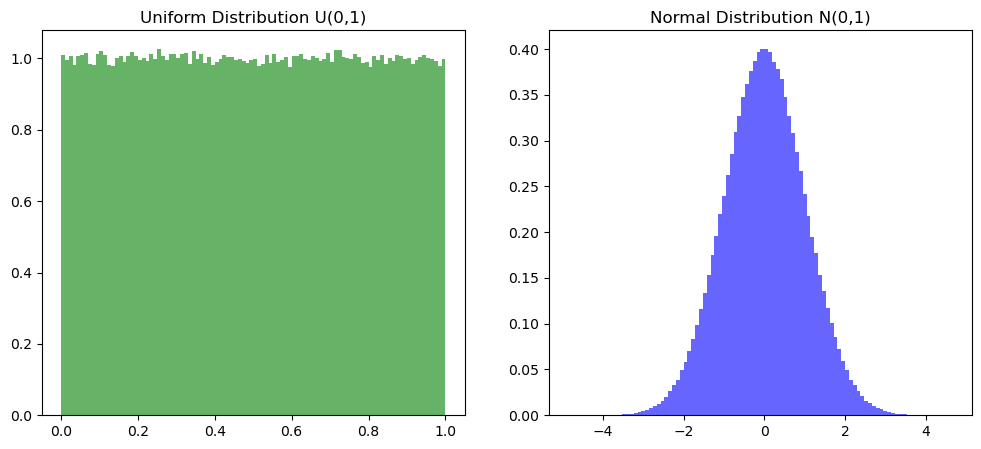

In [2]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(x_sample.numpy(), bins=100, density=True, alpha=0.6, color='g')
plt.title('Uniform Distribution U(0,1)')
plt.subplot(1, 2, 2)
plt.hist(y_sample.numpy(), bins=100, density=True, alpha=0.6, color='b')
plt.title('Normal Distribution N(0,1)')
plt.show()

### PMF / PDF / CDF

- 누적분포함수(累積分布函數, 영어: cumulative distribution function, 약자 CDF)는 주어진 확률 변수가 특정 값보다 작거나 같은 확률을 나타내는 함수이다.
    - Formular
        - $F_X(x) = P(X \le x)$
    - Properties
        - $0 \le F_X(x) \le 1$ 
        - if $ x_1 \le x_2,$ then $F_X(x_1) \le F_X(x_2)$
        - $F_X(- \inf) = 0$
        - $F_X(\inf) = 1$
        - $P(x_1 \lt X \le x_2) = F_X(x_2) - F_X(x_1)$
        - $P(x_1 \lt X) = 1 - F_X(x_1)$
        - $x$: 확률변수 X의 표본 공간에 없는 값도 가능
        - ex) 주사위 예시에서 $F_X(-3) = P(X \le -3) = 0$


- 확률 밀도 함수(確率密度函數, 영어: probability density function 약자 PDF)는 확률 변수의 분포를 나타내는 함수이다. 확률 분포 함수에서는 이산적인 확률 분포와 별개로 연속적인 확률 분포를 다룬다. 
    - 왜 밀도인가?
    - $X:x \in (x_1,x_2), x:$ real number, <b> uncountably infinite </b>
    - $x_1$과 $x_2$ 사이의 무한히 많은 실수 각각을 뽑을 확률을 정의하려면 확률 자체가 정의가 안됨.
    - ${1}\over {\inf}$ = $0$
    - 어떻게 연속 함수에 대하여 확률값을 지정(assign) 할 수 있을까?
    - CDF를 이용해서 확률 밀도 함수를 지정하자.
    - Formular
        - $f_X(x)$ = $dF_X(x) \over dx$

- 확률 질량 함수(確率質量函數, probability mass function, PMF)는 이산 확률 변수에서 특정 값에 대한 확률을 나타내는 함수이다. 이 함수는 연속 확률 변수에서의 확률 밀도 함수와 대응된다.

In [40]:
class Dice:
    def __init__(self):
        self.faces = torch.arange(1, 7)
        self.probabilities = torch.ones(6) / 6
        self.results = None

    def roll(self, num_roll):
        # 한 번에 샘플링 + 1 더해줌
        self.results = torch.multinomial(self.probabilities, num_samples=num_roll, replacement=True) + 1
        return torch.tensor(self.results)
    
# 사용 예시
dice = Dice()
samples = dice.roll(1_000_000)
print(samples[:10])
results = dice.results

# PMF 계산
pmf = torch.tensor([(results == f).sum().float() / len(results) for f in dice.faces])
print("PMF:", pmf)

#CDF 계산
cdf = torch.cumsum(pmf, dim=0)
print("CDF:", cdf)

tensor([5, 4, 1, 1, 3, 4, 5, 5, 4, 5])
PMF: tensor([0.1661, 0.1670, 0.1666, 0.1668, 0.1667, 0.1668])
CDF: tensor([0.1661, 0.3331, 0.4997, 0.6665, 0.8332, 1.0000])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_97992\2778971327.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(self.results)


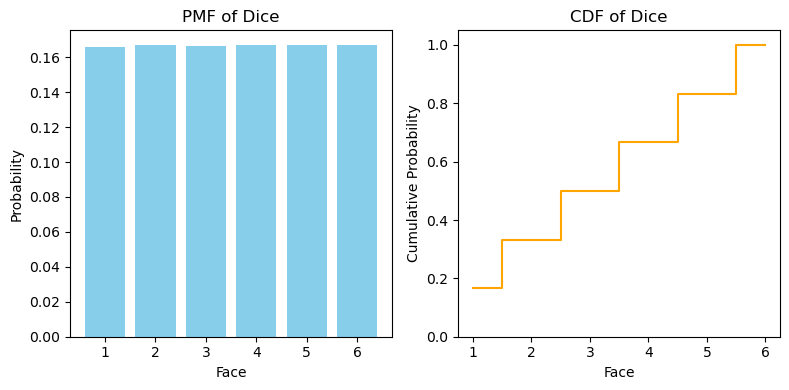

In [41]:
plt.figure(figsize=(8,4))

# PMF
plt.subplot(1,2,1)
plt.bar(dice.faces.numpy(), pmf.numpy(), color='skyblue')
plt.title("PMF of Dice")
plt.xlabel("Face")
plt.ylabel("Probability")

# CDF
plt.subplot(1,2,2)
plt.step(dice.faces.numpy(), cdf.numpy(), where='mid', color='orange')
plt.title("CDF of Dice")
plt.xlabel("Face")
plt.ylabel("Cumulative Probability")
plt.ylim(0,1.05)

plt.tight_layout()
plt.show()

### Expectation (기댓값), Variance (분산)
- Expectation
    - 확률론에서 확률 변수의 기댓값(期待값, 영어: expected value, $E$)은 각 사건이 벌어졌을 때의 이득과 그 사건이 벌어질 확률을 곱한 것을 전체 사건에 대해 합한 값이다. 이것은 어떤 확률적 사건에 대한 평균의 의미로 생각할 수 있다. 이 경우 '모 평균'으로 다룰수있다.
    - 모 평균(population mean) $μ$는 모 집단의 평균이다. 모두 더한 후 전체 데이터 수 $n$으로 나눈다. 확률 변수의 기댓값이다.
    - 주사위의 경우를 예시로 들어보자.

In [46]:
# 흔히 구하는 법
expectation = (dice.faces * dice.probabilities).sum()
print(expectation)

# dot product와 같다.
expectation_dot = dice.faces.float().dot(dice.probabilities.T)
print(expectation_dot)

# sampling을 통한 경험적 확인
experimental_expectation = results.float().mean()
print(experimental_expectation)

tensor(3.5000)
tensor(3.5000)
tensor(3.5014)


- Variance
    - 분산(分散, 영어: variance, Var)은 그 확률변수가 기댓값으로부터 얼마나 떨어진 곳에 분포하는지를 가늠하는 숫자이다. 기댓값은 확률변수의 위치를 나타내고 분산은 그것이 얼마나 넓게 퍼져 있는지를 나타낸다.
    - 평균에서 얼마나 떨어져 있는지를 제곱하여 평균낸 값
    - $Var(X) = E[(X-\mu)^2] = E[X^2] - E[X]^2$ 
    - $\mu$ = Expected value
    - 모분산(population variance) σ2은 모집단의 분산이다. 관측값에서 모 평균을 빼고 그것을 제곱한 값을 모두 더하여 전체 데이터 수 n으로 나눈 것이다.

    - 표본분산(sample variance) s2은 표본의 분산이다. 관측값에서 표본 평균을 빼고 제곱한 값을 모두 더한 것을 n-1로 나눈 것이다.

In [50]:
expectation_sq = torch.sum(dice.faces**2 * dice.probabilities)
variance = expectation_sq - expectation**2
print("주사위 이론 분산:", variance.item())

expectation_sq = torch.sum(dice.faces**2 * dice.probabilities)
variance = expectation_sq - experimental_expectation**2
print("주사위 이론 분산:", variance.item())

주사위 이론 분산: 2.916667938232422
주사위 이론 분산: 2.9069223403930664


### Conditional Probability (조건부 확률)

- 확률론에서 조건부 확률(條件附確率, 영어: conditional probability)은 주어진 사건이 일어났을 때 다른 한 사건이 일어날 확률을 뜻한다. 원래의 확률 함수를 $P$ 라고 할 때, 사건 $B$가 일어났을 때 사건 $A$가 일어날 조건부 확률은 $P(A|B)$로 표기한다.
- $ P(A∣B) = {P(A \cap B) \over P(B)}​,P(B)\neq0$ 
- 아까 이용한 주사위에서 짝수가 나왔을때 4가 나올 확률을 구해보자.

In [55]:
B = dice.faces % 2 == 0  # 짝수인 경우
A = dice.faces == 4     # 4인 경우

p_A_B = torch.sum(A & B) / torch.sum(B)
print("P(4 | 짝수) =", p_A_B.item())

B = results % 2 == 0  # 짝수인 경우
A = results == 4     # 4인 경우

p_A_B = torch.sum(A & B).float() / torch.sum(B).float()
print("P(4 | 짝수) =", p_A_B.item())

P(4 | 짝수) = 0.3333333432674408
P(4 | 짝수) = 0.33322545886039734


### Independence (독립성)
- 확률론에서 두 사건이 독립(獨立, 영어: independent)이라는 것은, 한 사건이 일어날 확률이 다른 사건이 일어날 확률에 영향을 미치지 않는다는 것을 의미한다. 특히 통계학에서 통계적 독립(statistically independent) 또는 독립성(independence)이라고도 한다.
- 주사위의 모든 사건은 독립성이 보장이 된다.
- $P(A \cap B)=P(A)P(B)$

In [ ]:
# 1. 두 번 주사위 던지기 (각각 독립)
n = 1_000_000
dice1 = Dice().roll(num_roll=n)
dice2 = Dice().roll(num_roll=n)

# 2. 사건 정의
A = dice1 == 4          # 첫 번째 주사위가 4
B = dice2 % 2 == 0      # 두 번째 주사위가 짝수

# 3. 각 확률 계산
p_A = A.float().mean()
p_B = B.float().mean()
p_A_and_B = (A & B).float().mean()

# 4. 독립성 검증
print("P(A) =", p_A.item())
print("P(B) =", p_B.item())
print("P(A∩B) =", p_A_and_B.item())
print("P(A)*P(B) =", (p_A * p_B).item())

if torch.isclose(p_A_and_B, p_A * p_B, atol=1e-3):
    print("✅ A와 B는 독립입니다.")
else:
    print("❌ A와 B는 독립이 아닙니다.")

P(A) = 0.16629600524902344
P(B) = 0.4998140037059784
P(A∩B) = 0.08304300159215927
P(A)*P(B) = 0.08311707526445389
✅ A와 B는 독립입니다.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_97992\2778971327.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(self.results)


In [68]:
# 2. 사건 정의
A = dice1 == 4          # 첫 번째 주사위가 4
B = dice1 % 2 == 0      # 첫 번째 주사위가 짝수

# 3. 각 확률 계산
p_A = A.float().mean()
p_B = B.float().mean()
p_A_and_B = (A & B).float().mean()

# 4. 독립성 검증
print("P(A) =", p_A.item())
print("P(B) =", p_B.item())
print("P(A∩B) =", p_A_and_B.item())
print("P(A)*P(B) =", (p_A * p_B).item())

if torch.isclose(p_A_and_B, p_A * p_B, atol=1e-3):
    print("✅ A와 B는 독립입니다.")
else:
    print("❌ A와 B는 독립이 아닙니다.")

P(A) = 0.16629600524902344
P(B) = 0.49971500039100647
P(A∩B) = 0.16629600524902344
P(A)*P(B) = 0.08310060948133469
❌ A와 B는 독립이 아닙니다.
